In [2]:
import numpy as np
import os
import random
from scipy.integrate import solve_ivp


In [3]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.offsetbox import AnchoredText

In [5]:
%matplotlib inline

In [4]:
dirName = './DATA'
if not os.path.exists(dirName):
    os.mkdir(dirName)

# Parameters Lorenz Model


In [6]:
# Lorenz paramters and initial conditions
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
sigma, beta, rho = 10, 2.667, 28

def lorenz(t, X):
    """The Lorenz equations."""
    F = np.zeros(3)
    sigma, beta, rho = 10, 2.667, 28
    u, v, w = X[0], X[1], X[2]
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    F[0], F[1], F[2] = up, vp, wp
    return F

# Solve Lorenz Model preparations


In [7]:
# Integrate the Lorenz equations on the time grid t

# 2 of 3 Fixed Points 
u1 = (beta*(rho-1))**(1/2)
v1 = (beta*(rho-1))**(1/2)
w1 = (rho-1)

u2 = -(beta*(rho-1))**(1/2)
v2 = -(beta*(rho-1))**(1/2)
w2 = (rho-1)

# fixed points
X0 = np.array([0, 0, 0])
X1 = np.array([u1, v1, w1])
X2 = np.array([u2, v2, w2])

# matrix with fixed points
XE = np.array([[X0], [X1], [X2]])

# time and space
tmax, n = 30, 3000
t = np.linspace(0, tmax*9, n*9)
X = np.array([u0, v0, w0]) # I.C. far from fixed points 

In [28]:
print(X)

[ 2.02814623 -0.90655314 25.20430502]


# Solve


In [8]:
LongTimeSolve=[0,tmax*9]
PartialTimeSolve=[0,tmax]

In [9]:
f = solve_ivp(lorenz, LongTimeSolve, X, method='RK45',t_eval=t) # delta t = 0.01 circa
F = f.y

In [9]:
print(f.t[1]-f.t[0])

0.010000370384088299


In [10]:
print(F)

[[ 0.          0.09511014  0.1826739  ...  0.57107655  0.36479501
   0.1815106 ]
 [ 1.          1.00303729  1.03049251 ... -1.6172886  -1.57772285
  -1.54674548]
 [ 1.05        1.02284449  0.99732364 ... 23.22403881 22.60547776
  22.00635786]]


# PLOTS

In [10]:
plt.rcParams['figure.figsize'] = [10, 7]

Lorenz Vanilla



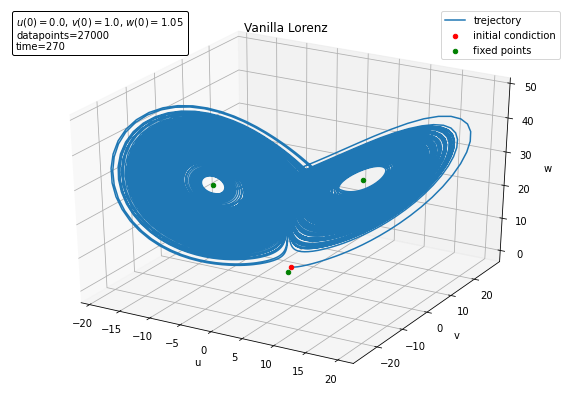

In [11]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(F[0], F[1], F[2])
ax.scatter3D(F[:,0][0],F[:,0][1],F[:,0][2],c='red')  # first point of the trajectory
ax.scatter3D(X0[0],X0[1],X0[2],c='green') # fixed point
ax.scatter3D(X1[0],X1[1],X1[2],c='green') # fixed point
ax.scatter3D(X2[0],X2[1],X2[2],c='green')
plt.title('Vanilla Lorenz')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('w')
plt.legend(['trejectory','initial condiction','fixed points'])
param = AnchoredText(rf'$u(0)=${F[:,0][0]}, $ v(0)=${F[:,0][1]}, $w(0)=${F[:,0][2]}'+'\n'+rf'datapoints={n*9}'+'\n'+rf'time={tmax*9}',
                     prop=dict(size=10), frameon=True, loc='upper left')
param.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(param)
plt.draw()
plt.show()

Lorenz T ergo

In [12]:
seed = np.random.randint(F.shape[1],size=10)   #vector of 10 random integers < number of trajectory's points
tmax, n = 30, 3000
t = np.linspace(0, tmax*9, n*9)
X = F[:,seed[9]]+np.random.rand(3)*1e-4        # choose a random point close to the real trajectory

f_ergo = solve_ivp(lorenz, LongTimeSolve, X, method='RK45',t_eval=t) # use this random point as starting point
F_ergo = f_ergo.y

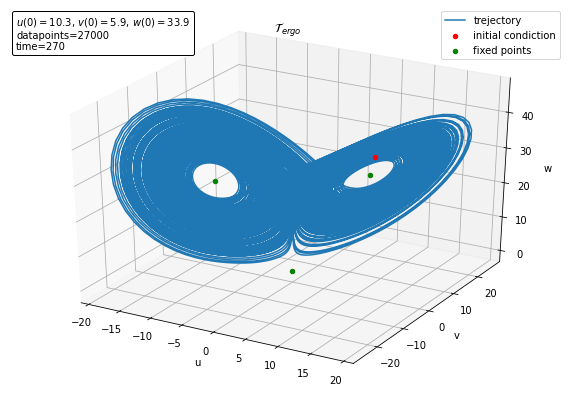

In [13]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(F_ergo[0], F_ergo[1], F_ergo[2])
ax.scatter3D(F_ergo[:,0][0],F_ergo[:,0][1],F_ergo[:,0][2],c='red') # first point of the trajectory
ax.scatter3D(X0[0],X0[1],X0[2],c='green') # fixed point
ax.scatter3D(X1[0],X1[1],X1[2],c='green') # fixed point
ax.scatter3D(X2[0],X2[1],X2[2],c='green') # fixed point
plt.title(r' $\mathcal{T}_{ergo}$')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('w')
plt.legend(['trejectory','initial condiction','fixed points'])
param = AnchoredText(rf'$u(0)=${F_ergo[:,0][0].round(decimals=1)}, $ v(0)=${F_ergo[:,0][1].round(decimals=1)}, $w(0)=${F_ergo[:,0][2].round(decimals=1)}'
                    +'\n'+rf'datapoints={n*9}'+'\n'+rf'time={tmax*9}',
                     prop=dict(size=10), frameon=True, loc='upper left')
param.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(param)
plt.draw()
plt.show()

Lorenz partial dynamics

In [14]:
t = np.linspace(0, tmax, n)
f_short = solve_ivp(lorenz, PartialTimeSolve, F[:,seed[2]]+np.random.rand(3)*1e-4, method='RK45',t_eval=t)
F_short = f_short.y

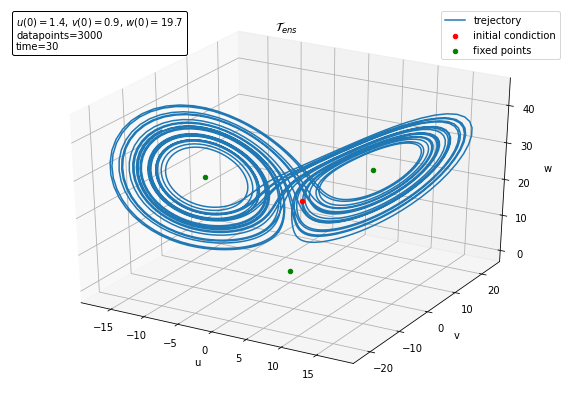

In [15]:
fig = plt.figure()
ax = fig.gca(projection="3d")
ax.plot(F_short[0], F_short[1], F_short[2])
ax.scatter3D(F_short[:,0][0],F_short[:,0][1],F_short[:,0][2],c='red') # first point of the trajectory
ax.scatter3D(X0[0],X0[1],X0[2],c='green') # fixed point
ax.scatter3D(X1[0],X1[1],X1[2],c='green') # fixed point
ax.scatter3D(X2[0],X2[1],X2[2],c='green') # fixed point
plt.title(r'$\mathcal{T}_{ens}$')
ax.set_xlabel('u')
ax.set_ylabel('v')
ax.set_zlabel('w')
plt.legend(['trejectory','initial condiction','fixed points'])
param = AnchoredText(rf'$u(0)=${F_short[:,0][0].round(decimals=1)}, $ v(0)=${F_short[:,0][1].round(decimals=1)}, $w(0)=${F_short[:,0][2].round(decimals=1)}'
                    +'\n'+rf'datapoints={n}'+'\n'+rf'time={tmax}',
                     prop=dict(size=10), frameon=True, loc='upper left')
param.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
ax.add_artist(param)
plt.draw()
plt.show()

# manifold dynamics

In [34]:
eps = np.random.rand(3,3)
Q,R = np.linalg.qr(eps)
Q=Q*1
t = np.linspace(0, tmax, n)
sol = []
for j in range(3):
    for i in range(3):
        f_man = solve_ivp(lorenz, PartialTimeSolve, np.squeeze(XE[j,:],axis=0)+Q[:,i], method='RK45',t_eval=t) # solves lorenz model starting close to the fixed points
        sol.append(f_man.y)

In [29]:
sol[0]

array([[ 0.        ,  0.09511014,  0.1826739 , ...,  0.57107655,
         0.36479501,  0.1815106 ],
       [ 1.        ,  1.00303729,  1.03049251, ..., -1.6172886 ,
        -1.57772285, -1.54674548],
       [ 1.05      ,  1.02284449,  0.99732364, ..., 23.22403881,
        22.60547776, 22.00635786]])

In [30]:
print(sol[0][0][0],sol[0][1][0],sol[0][2][0])

0.0 1.0 1.05


grafici lorenz traiettorie vicine a punti fissi

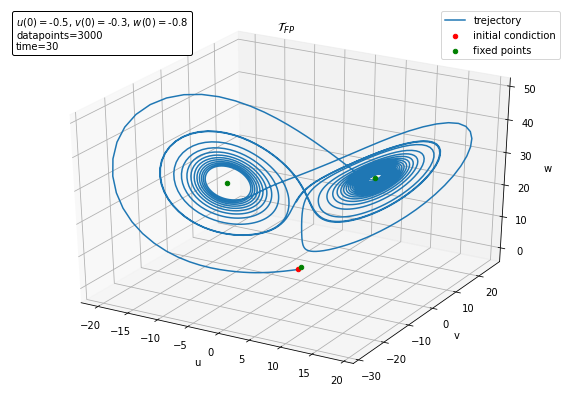

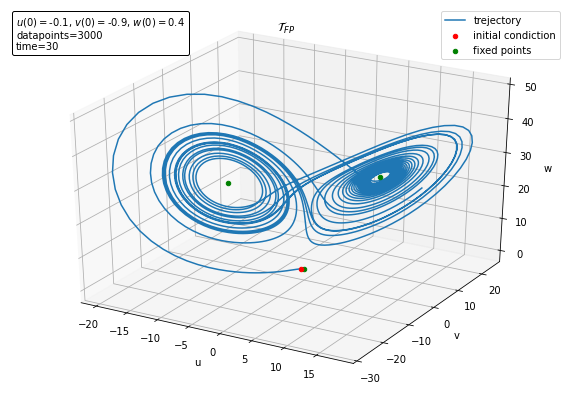

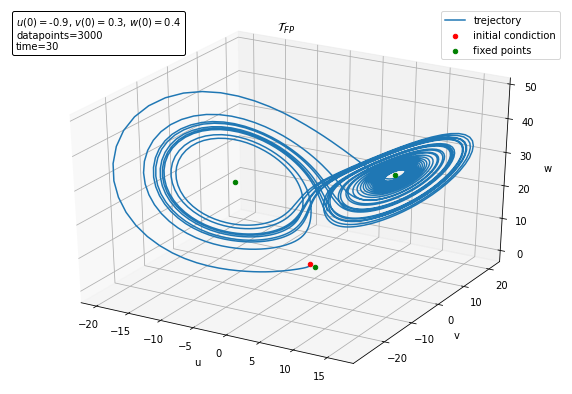

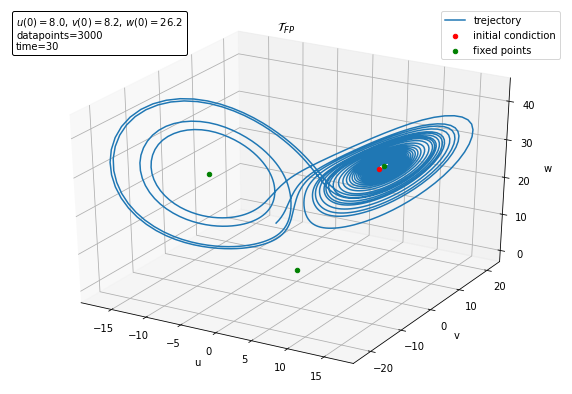

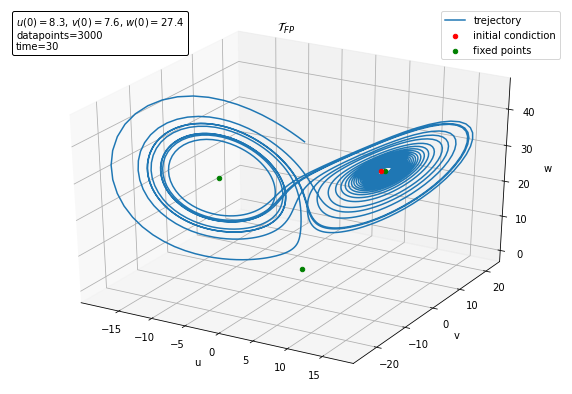

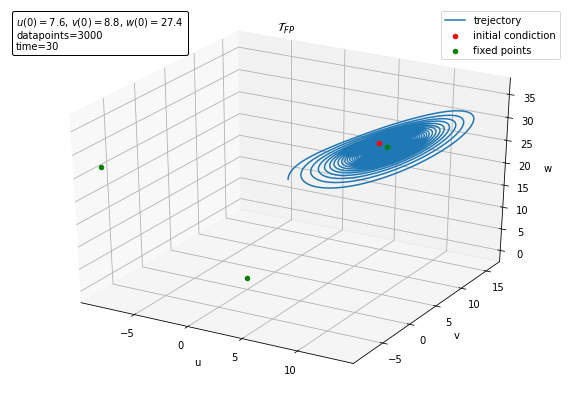

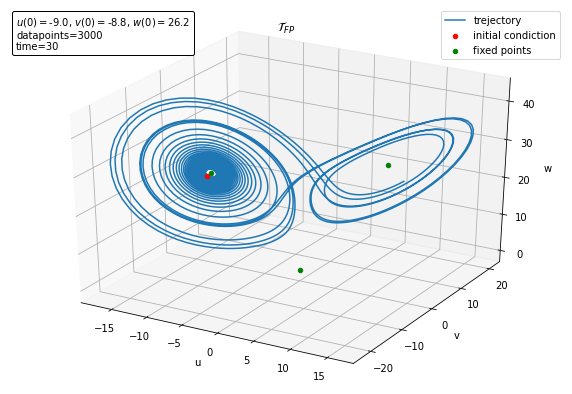

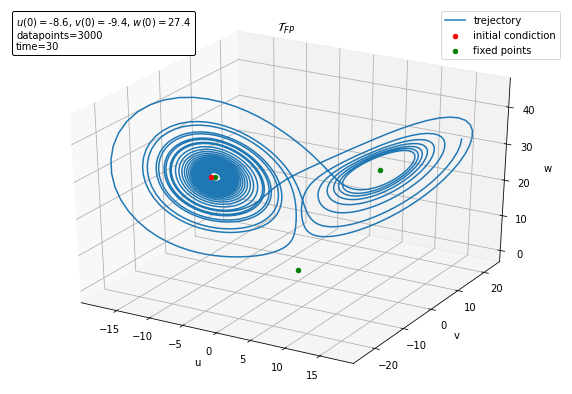

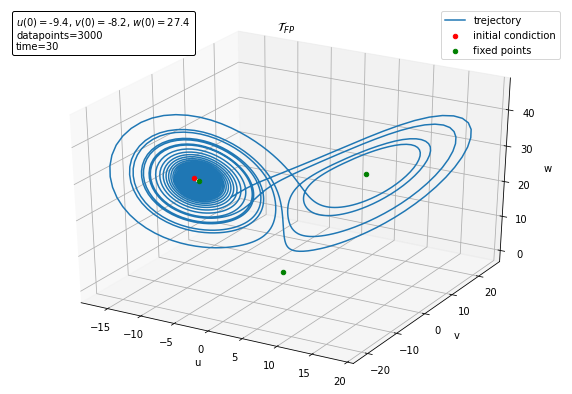

In [36]:
for j in range(9):
  fig = plt.figure()
  ax = fig.gca(projection="3d")
  ax.plot(sol[j][0], sol[j][1], sol[j][2])
  ax.scatter3D(sol[j][0][0],sol[j][1][0],sol[j][2][0],c='red') # first point of the trajectory
  ax.scatter3D(X0[0],X0[1],X0[2],c='green') # fixed point
  ax.scatter3D(X1[0],X1[1],X1[2],c='green') # fixed point
  ax.scatter3D(X2[0],X2[1],X2[2],c='green') # fixed point
  plt.title(r'$\mathcal{T}_{FP}$')
  ax.set_xlabel('u')
  ax.set_ylabel('v')
  ax.set_zlabel('w')
  plt.legend(['trejectory','initial condiction','fixed points'])
  param = AnchoredText(rf'$u(0)=${sol[j][0][0].round(decimals=1)}, $ v(0)=${sol[j][1][0].round(decimals=1)}, $w(0)=${sol[j][2][0].round(decimals=1)}'
                      +'\n'+rf'datapoints={n}'+'\n'+rf'time={tmax}',
                      prop=dict(size=10), frameon=True, loc='upper left')
  param.patch.set_boxstyle("round,pad=0.,rounding_size=0.2")
  ax.add_artist(param)
  plt.draw()
  plt.show()

In [ ]:

# k was 100 
for k in range(2):
    print('ITER: '+str(k))
    ''' full dynamic'''
    seed = np.random.randint(F.shape[1],size=10)   #vector of 10 random integers < number of trajectory's points
    tmax, n = 30, 3000
    t = np.linspace(0, tmax*9, n*9)
    X = F[:,seed[9]]+np.random.rand(3)*1e-4        # choose a random point close to the trajectory
    
    f = solve_ivp(lorenz, [0,tmax*9], X, method='RK45',t_eval=t) # use this random point as starting point
    F = f.y
    np.save('./DATA/FULL_'+str(k),F)
    print('    Full data: DONE')
    
    ''' partial dynamics'''
    t = np.linspace(0, tmax, n)
    sol = []
    for i in range(9):
        f = solve_ivp(lorenz, [0,tmax], F[:,seed[i]]+np.random.rand(3)*1e-4, method='RK45',t_eval=t)
        sol.append(f.y)
    np.save('./DATA/PART_'+str(k),np.asarray(sol))
    print('    Partial data: DONE')
    
    ''' manifold dynamics'''
    
    eps = np.random.rand(3,3)
    Q,R = np.linalg.qr(eps)
    Q=Q*1
    t = np.linspace(0, tmax, n)
    sol = []
    for j in range(3):
        for i in range(3):
            f = solve_ivp(lorenz, [0,tmax], np.squeeze(XE[j,:],axis=0)+Q[:,i], method='RK45',t_eval=t)
            sol.append(f.y)
    np.save('./DATA/MANI_'+str(k),np.asarray(sol))
    print('    Manifold data: DONE')
